In [1]:
import pandas as pd
import os
from glob import glob

In [2]:
os.chdir(r'R:\g-and-n\visual_models_results')

In [3]:
min_factor = [2**i for i in range(7)]
min_factor

[1, 2, 4, 8, 16, 32, 64]

In [4]:
flds = [str(mf*1000 +49) for mf in min_factor]
flds

['1049', '2049', '4049', '8049', '16049', '32049', '64049']

In [5]:
models = ['UNET1TO1', 'UNET4TO1', 'UNET5TO5', 'AUTO1T01', 'AUTO4T01']

In [15]:
mf_dfs = []
for model in models:
    for fld in flds:
        if os.path.exists(fr'{fld}\{model}\channel DNA\results.csv'):
            df = pd.read_csv(fr'{fld}\{model}\channel DNA\results.csv', index_col=list(range(6)))
            df['Minimize_Factor'] = int(fld)//1000
            df['Model'] = model
#             df = df.groupby(['Model', 'Minimize_Factor', 'Well_Role']).describe()
            df = df.groupby(['Model','Minimize_Factor','Plate','Well','Broad_Sample']).mean()
            mf_dfs.append(df)

mf_dfs=pd.concat(mf_dfs)

In [16]:
mf_dfs

PCC       MSE
Model    Minimize_Factor Plate Well Broad_Sample                              
UNET1TO1 1               24734 a01  BRD-K64649217-001-01-9  0.997748  0.000282
                               a02  BRD-K77120024-001-02-7  0.997750  0.000284
                               a03  BRD-K09324395-001-02-9  0.997528  0.000275
                               a04  BRD-K15713104-001-02-7  0.997388  0.000188
                               a05  BRD-K73170797-001-02-1  0.997518  0.000297
...                                                              ...       ...
AUTO4T01 64              26672 p20  BRD-K72383170-001-01-0  0.639292  1.385683
                               p21  BRD-K57476701-001-01-9  0.790550  0.306610
                               p22  BRD-K84443834-001-01-6  0.794574  0.274747
                               p23  BRD-K11345845-001-01-8  0.749199  0.737566
                               p24  BRD-K19558952-001-01-7  0.685134  0.489183

[75648 rows x 2 columns]

In [14]:
mf_dfs[mf_dfs.index.isin(['UNET4TO1','AUTO4T01'],0)]

PCC                                \
                                      count      mean       std       min   
Model    Minimize_Factor Well_Role                                          
UNET4TO1 1               mock        2016.0  0.933981  0.052173  0.625509   
                         treated     9486.0  0.930049  0.061302  0.334661   
         2               mock        2016.0  0.921581  0.055476  0.660843   
                         treated     9486.0  0.915979  0.065150  0.301343   
         4               mock        2016.0  0.928969  0.044064  0.581788   
                         treated     9486.0  0.923853  0.058044  0.150977   
         8               mock        2016.0  0.887055  0.100449  0.314560   
                         treated     9486.0  0.877532  0.117248  0.167948   
         16              mock        2016.0  0.804528  0.223107  0.031674   
                         treated     9486.0  0.789728  0.236144  0.009481   
AUTO4T01 1               mock        2784.0  0.925638  0.043645  0.325684   
                         treated    13318.0  0.923226  0.054961  0.079903   
         2               mock        2784.0  0.914039  0.051503  0.327125   
                         treated    13318.0  0.910964  0.062540  0.039948   
         4               mock        2784.0  0.907085  0.054721  0.327156   
                         treated    13318.0  0.903073  0.069608  0.020259   
         8               mock        2784.0  0.897495  0.076166  0.319556   
                         treated    13318.0  0.892088  0.092711  0.125448   
         16              mock        2784.0  0.841520  0.142105  0.216013   
                         treated    13318.0  0.834404  0.156521  0.004736   
         32              mock        2784.0  0.825346  0.072353  0.308057   
                         treated    13318.0  0.820874  0.080641  0.086104   
         64              mock        2784.0  0.783854  0.097793 -0.002382   
                         treated    13318.0  0.775157  0.120801 -0.020337   

                                                                            \
                                         25%       50%       75%       max   
Model    Minimize_Factor Well_Role                                           
UNET4TO1 1               mock       0.928989  0.954711  0.967588  0.986042   
                         treated    0.922711  0.955337  0.968250  0.988885   
         2               mock       0.914253  0.942787  0.957444  0.986759   
                         treated    0.907769  0.940627  0.956835  0.986123   
         4               mock       0.922719  0.943479  0.956607  0.987090   
                         treated    0.918271  0.943300  0.956838  0.985756   
         8               mock       0.884096  0.932223  0.949552  0.978968   
                         treated    0.873350  0.930804  0.950051  0.984640   
         16              mock       0.793212  0.921170  0.941511  0.976998   
                         treated    0.761137  0.921034  0.941844  0.980562   
AUTO4T01 1               mock       0.918470  0.939719  0.951026  0.974330   
                         treated    0.917460  0.940712  0.952297  0.981279   
         2               mock       0.904656  0.931365  0.945827  0.975510   
                         treated    0.903759  0.931591  0.946662  0.980266   
         4               mock       0.898954  0.924611  0.938896  0.974168   
                         treated    0.897435  0.925059  0.940575  0.975710   
         8               mock       0.896595  0.924396  0.938622  0.970234   
                         treated    0.895365  0.925087  0.940011  0.980973   
         16              mock       0.841327  0.899199  0.922253  0.958872   
                         treated    0.836921  0.898936  0.923541  0.966973   
         32              mock       0.803014  0.841858  0.873753  0.938357   
                         treated    0.799861  0.840848  0.873372  0.952737   
         6

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
def zscore(df):
    scaler = StandardScaler()
    scaler.fit(df.query('Broad_Sample == "DMSO"'))
    
    return pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

In [20]:
zscores = mf_dfs.groupby(['Model', 'Minimize_Factor', 'Plate']).apply(zscore)

In [21]:
zscores['PCC'] = zscores['PCC']*-1

In [22]:
zscores.reset_index()['Model'].unique()

array(['UNET1TO1', 'UNET4TO1', 'UNET5TO5', 'AUTO1T01', 'AUTO4T01'],
      dtype=object)

In [23]:
zscores

PCC       MSE
Model    Minimize_Factor Plate Well Broad_Sample                              
UNET1TO1 1               24734 a01  BRD-K64649217-001-01-9 -0.015539 -0.386904
                               a02  BRD-K77120024-001-02-7 -0.026553 -0.302271
                               a03  BRD-K09324395-001-02-9  1.059687 -0.609672
                               a04  BRD-K15713104-001-02-7  1.739101 -3.428382
                               a05  BRD-K73170797-001-02-1  1.108120  0.104401
...                                                              ...       ...
AUTO4T01 64              26672 p20  BRD-K72383170-001-01-0  5.872256  8.736550
                               p21  BRD-K57476701-001-01-9 -0.590820 -0.481310
                               p22  BRD-K84443834-001-01-6 -0.762767 -0.753500
                               p23  BRD-K11345845-001-01-8  1.176081  3.200079
                               p24  BRD-K19558952-001-01-7  3.913499  1.078295

[75648 rows x 2 columns]

In [31]:
import matplotlib.pyplot as plt

In [31]:
zscores.query(f'Model == "AUTO1T01" and Minimize_Factor == 2')

PCC       MSE
Model    Minimize_Factor Plate Well Broad_Sample                              
AUTO1T01 2               24734 a01  BRD-K64649217-001-01-9  0.649222 -0.242189
                               a02  BRD-K77120024-001-02-7  0.315771 -0.338309
                               a03  BRD-K09324395-001-02-9  0.515920 -1.095377
                               a04  BRD-K15713104-001-02-7  1.316216 -2.455637
                               a05  BRD-K73170797-001-02-1  1.092717  0.211104
...                                                              ...       ...
                         26672 p20  BRD-K72383170-001-01-0  0.041098  2.633962
                               p21  BRD-K57476701-001-01-9 -0.189575 -0.495382
                               p22  BRD-K84443834-001-01-6 -0.453383 -0.864596
                               p23  BRD-K11345845-001-01-8 -1.285302  1.136173
                               p24  BRD-K19558952-001-01-7 -0.830472 -1.024328

[2688 rows x 2 columns]

In [26]:
zscores.query(f'Model == "AUTO1T01" and Minimize_Factor == 2 and Broad_Sample=="DMSO"')['PCC']

Model     Minimize_Factor  Plate  Well  Broad_Sample
AUTO1T01  2                24734  a13   DMSO           -1.230189
                                  a14   DMSO           -0.639811
                                  b13   DMSO           -1.651485
                                  b14   DMSO            1.222524
                                  c11   DMSO            0.098402
                                                          ...   
                           26672  n14   DMSO           -0.631855
                                  o11   DMSO            0.354108
                                  o12   DMSO            0.350902
                                  p11   DMSO           -0.815531
                                  p12   DMSO           -1.529061
Name: PCC, Length: 464, dtype: float64

1 2


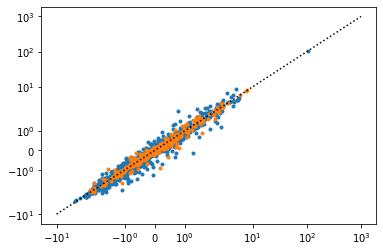

1 4


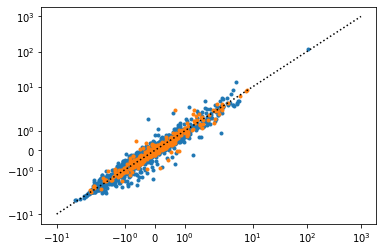

1 8


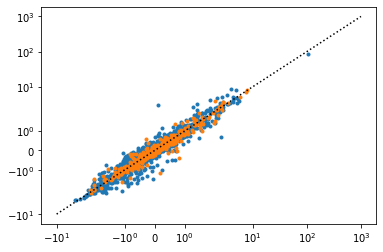

1 16


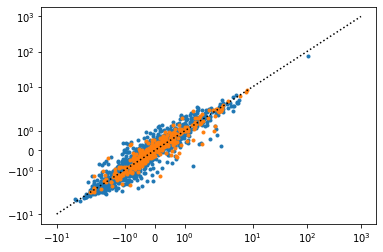

1 32


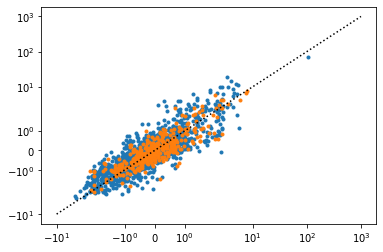

1 64


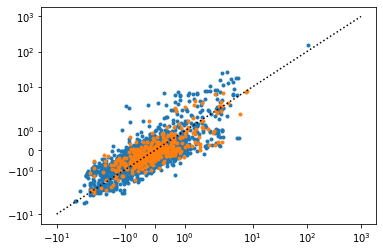

In [38]:
metric='MSE'
for i,j in [(1,2), (1,4), (1,8),(1,16), (1,32), (1,64)]:#zip(min_factor[:-1], min_factor[1:]):
    print(i,j)
    plt.plot(zscores.query(f'Model == "AUTO1T01" and Minimize_Factor == {i} and Broad_Sample!="DMSO"')[metric],zscores.query(f'Model == "AUTO1T01" and Minimize_Factor == {j} and Broad_Sample!="DMSO"')[metric], '.')
    plt.plot(zscores.query(f'Model == "AUTO1T01" and Minimize_Factor == {i} and Broad_Sample=="DMSO"')[metric],zscores.query(f'Model == "AUTO1T01" and Minimize_Factor == {j} and Broad_Sample=="DMSO"')[metric], '.')
    
    plt.plot(range(-10,1000),range(-10,1000),'k:')
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.show()